In [1]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Gill Sans MT')

In [2]:
sc = StatsCan()


In [3]:
sc.update_tables()

['14100017',
 '14100050',
 '14100378',
 '14100379',
 '17100020',
 '17100040',
 '17100059']

In [4]:
world_mig = sc.table_to_df('17-10-0040-01')
prov_mig = sc.table_to_df('17-10-0020-01')
nat_pop = sc.table_to_df('17-10-0059-01')

In [5]:
prov_mig.rename(columns={"Interprovincial migration":"Components of population growth"},inplace=True)
migrate = world_mig.append(prov_mig)
nat_pop.rename(columns={"Estimates":"Components of population growth"},inplace=True)
migrate = migrate.append(nat_pop)

In [6]:
migrate

,REF_DATE,GEO,DGUID,Components of population growth,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01-01,Canada,2016A000011124,Immigrants,Persons,249,units,0,v29850342,1.1,12738.0,NaN,NaN,NaN,0
1,1946-01-01,Prince Edward Island,2016A000211,Immigrants,Persons,249,units,0,v29850352,3.1,73.0,NaN,NaN,NaN,0
2,1946-01-01,Nova Scotia,2016A000212,Immigrants,Persons,249,units,0,v29850357,4.1,701.0,NaN,NaN,NaN,0
3,1946-01-01,New Brunswick,2016A000213,Immigrants,Persons,249,units,0,v29850362,5.1,520.0,NaN,NaN,NaN,0
4,1946-01-01,Quebec,2016A000224,Immigrants,Persons,249,units,0,v29850367,6.1,2305.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11201,2021-07-01,Yukon,2016A000260,Deaths,Number,223,units,0,v80,12.2,85.0,NaN,NaN,NaN,0
11202,2021-07-01,Northwest Territories,2016A000261,Births,Number,223,units,0,v67,14.1,159.0,NaN,NaN,NaN,0
11203,2021-07-01,Northwest Territories,2016A000261,Deaths,Number,223,units,0,v82,14.2,71.0,NaN,NaN,NaN,0
11204,2021-07-01,Nunavut,2016A000262,Births,Number,223,units,0,v68,15.1,222.0,NaN,NaN,NaN,0


In [7]:
ab_migrate=migrate[migrate['GEO']=='Alberta']

In [8]:
ab_migrate.dropna(subset=['Components of population growth'],inplace=True)



C:\Users\mmak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
ab_migrate=ab_migrate[['REF_DATE','Components of population growth','VALUE']]

In [10]:
ab_migrate

,REF_DATE,Components of population growth,VALUE
8,1946-01-01,Immigrants,1044.0
20,1946-04-01,Immigrants,1718.0
32,1946-07-01,Immigrants,2095.0
44,1946-10-01,Immigrants,914.0
56,1947-01-01,Immigrants,569.0
...,...,...,...
11141,2021-01-01,Deaths,7815.0
11168,2021-04-01,Births,12413.0
11169,2021-04-01,Deaths,7126.0
11196,2021-07-01,Births,12499.0


In [11]:
ab_pivot = ab_migrate.pivot(index='REF_DATE',columns='Components of population growth',values='VALUE')

In [12]:
ab_pivot

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants
REF_DATE,,,,,,,,,,
1946-01-01,4791.0,1765.0,NaN,1044.0,NaN,1614.0,NaN,NaN,NaN,NaN
1946-04-01,5752.0,1619.0,NaN,1718.0,NaN,2572.0,NaN,NaN,NaN,NaN
1946-07-01,6012.0,1489.0,NaN,2095.0,NaN,2603.0,NaN,NaN,NaN,NaN
1946-10-01,5629.0,1728.0,NaN,914.0,NaN,2689.0,NaN,NaN,NaN,NaN
1947-01-01,6214.0,1778.0,NaN,569.0,NaN,1461.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12645.0,6903.0,531.0,4896.0,12592.0,NaN,-5065.0,70.0,13454.0,418.0
2020-10-01,11527.0,8473.0,693.0,5318.0,8659.0,NaN,877.0,89.0,10449.0,220.0
2021-01-01,12214.0,7815.0,1251.0,6769.0,15241.0,NaN,1068.0,104.0,18973.0,169.0


In [13]:
ab_pivot['Net interprovincial migration']=ab_pivot['In-migrants']-ab_pivot['Out-migrants']

ab_pivot['Net international migration']=ab_pivot['Immigrants']+ab_pivot['Net non-permanent residents']-ab_pivot['Emigrants']-ab_pivot['Net temporary emigrants']+ab_pivot['Returning emigrants']

ab_pivot['Total net migration']=ab_pivot['Net interprovincial migration']+ab_pivot['Net international migration']

ab_pivot['Net population growth']=ab_pivot['Total net migration']+ ab_pivot['Births']-ab_pivot['Deaths']

In [14]:
ab_pivot

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants,Net interprovincial migration,Net international migration,Total net migration,Net population growth
REF_DATE,,,,,,,,,,,,,,
1946-01-01,4791.0,1765.0,NaN,1044.0,NaN,1614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-04-01,5752.0,1619.0,NaN,1718.0,NaN,2572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-07-01,6012.0,1489.0,NaN,2095.0,NaN,2603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-10-01,5629.0,1728.0,NaN,914.0,NaN,2689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-01-01,6214.0,1778.0,NaN,569.0,NaN,1461.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12645.0,6903.0,531.0,4896.0,12592.0,NaN,-5065.0,70.0,13454.0,418.0,-862.0,-352.0,-1214.0,4528.0
2020-10-01,11527.0,8473.0,693.0,5318.0,8659.0,NaN,877.0,89.0,10449.0,220.0,-1790.0,5633.0,3843.0,6897.0
2021-01-01,12214.0,7815.0,1251.0,6769.0,15241.0,NaN,1068.0,104.0,18973.0,169.0,-3732.0,6651.0,2919.0,7318.0


C:\Users\mmak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


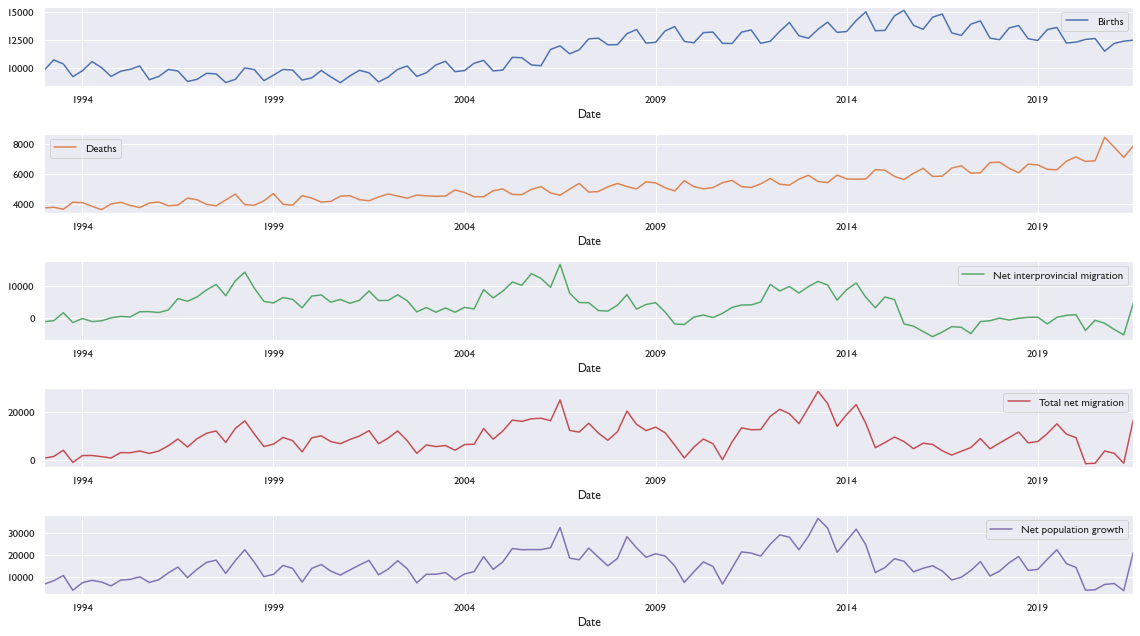

In [15]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('Alberta Components of Population Growth')


ab_pivot[['Births','Deaths','Net interprovincial migration','Total net migration','Net population growth']]['1993':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('migration.png')

C:\Users\mmak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
C:\Users\mmak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  
C:\Users\mmak\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


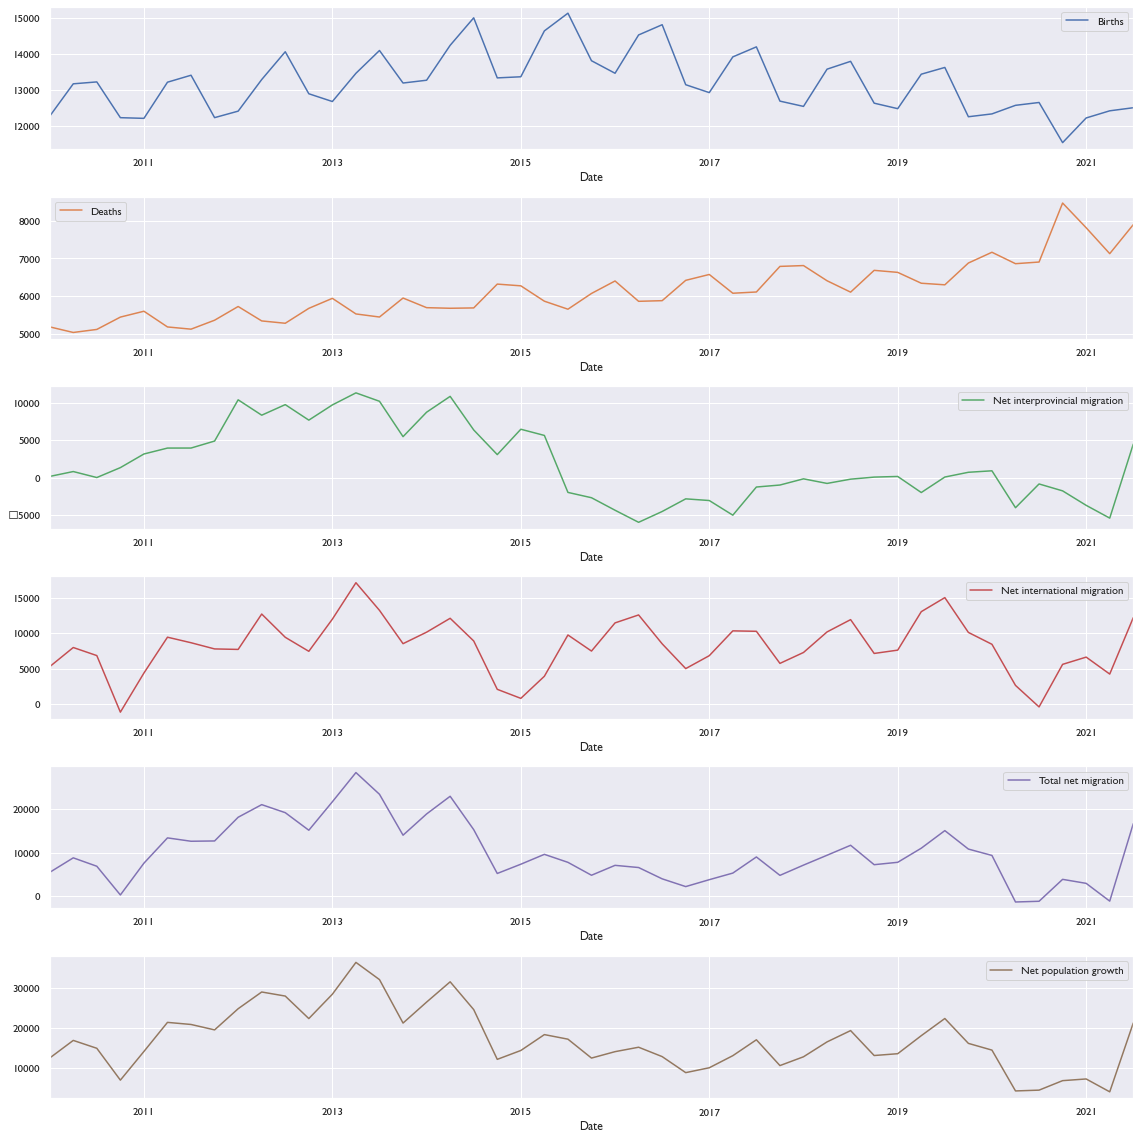

In [16]:
fig, ax = plt.subplots(figsize=(16,16))
ax.set_title('Alberta Components of Population Growth')


ab_pivot[['Births','Deaths','Net interprovincial migration','Net international migration','Total net migration','Net population growth']]['2010':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
#plt.savefig('migration.png')

In [23]:
ab_pivot.diff(4)['2017':]

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants,Net interprovincial migration,Net international migration,Total net migration,Net population growth
REF_DATE,,,,,,,,,,,,,,
2017-01-01,-539.0,173.0,-251.0,-1998.0,-776.0,NaN,-2763.0,10.0,-2080.0,-90.0,1304.0,-4610.0,-3306.0,-4018.0
2017-04-01,-611.0,215.0,-280.0,-3130.0,-515.0,NaN,706.0,4.0,-1473.0,-90.0,958.0,-2238.0,-1280.0,-2106.0
2017-07-01,-617.0,231.0,-373.0,-1634.0,-768.0,NaN,2848.0,-19.0,-4053.0,155.0,3285.0,1761.0,5046.0,4198.0
2017-10-01,-457.0,371.0,-381.0,-353.0,1188.0,NaN,599.0,-6.0,-668.0,100.0,1856.0,733.0,2589.0,1761.0
2018-01-01,-384.0,237.0,-342.0,-2739.0,547.0,NaN,2851.0,22.0,-2363.0,18.0,2910.0,450.0,3360.0,2739.0
2018-04-01,-342.0,332.0,-199.0,-666.0,2314.0,NaN,267.0,30.0,-1947.0,81.0,4261.0,-149.0,4112.0,3438.0
2018-07-01,-403.0,-4.0,-199.0,1958.0,-1090.0,NaN,-544.0,16.0,-2144.0,43.0,1054.0,1640.0,2694.0,2295.0
2018-10-01,-57.0,-105.0,150.0,1374.0,824.0,NaN,207.0,25.0,-240.0,-8.0,1064.0,1398.0,2462.0,2510.0
2019-01-01,-63.0,-181.0,68.0,-2084.0,-1145.0,NaN,2535.0,-3.0,-1464.0,-55.0,319.0,331.0,650.0,768.0


In [24]:
ab_pivot['2017':]

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants,Net interprovincial migration,Net international migration,Total net migration,Net population growth
REF_DATE,,,,,,,,,,,,,,
2017-01-01,12920.0,6572.0,1753.0,13368.0,14342.0,NaN,-4905.0,534.0,17428.0,676.0,-3086.0,6852.0,3766.0,10114.0
2017-04-01,13915.0,6073.0,1707.0,12297.0,18998.0,NaN,-1074.0,508.0,24050.0,1333.0,-5052.0,10341.0,5289.0,13131.0
2017-07-01,14194.0,6106.0,2403.0,8440.0,15585.0,NaN,2771.0,654.0,16859.0,2127.0,-1274.0,10281.0,9007.0,17095.0
2017-10-01,12683.0,6787.0,1243.0,7997.0,10085.0,NaN,-1228.0,523.0,11091.0,765.0,-1006.0,5768.0,4762.0,10658.0
2018-01-01,12536.0,6809.0,1411.0,10629.0,14889.0,NaN,-2054.0,556.0,15065.0,694.0,-176.0,7302.0,7126.0,12853.0
2018-04-01,13573.0,6405.0,1508.0,11631.0,21312.0,NaN,-807.0,538.0,22103.0,1414.0,-791.0,10192.0,9401.0,16569.0
2018-07-01,13791.0,6102.0,2204.0,10398.0,14495.0,NaN,2227.0,670.0,14715.0,2170.0,-220.0,11921.0,11701.0,19390.0
2018-10-01,12626.0,6682.0,1393.0,9371.0,10909.0,NaN,-1021.0,548.0,10851.0,757.0,58.0,7166.0,7224.0,13168.0
2019-01-01,12473.0,6628.0,1479.0,8545.0,13744.0,NaN,481.0,553.0,13601.0,639.0,143.0,7633.0,7776.0,13621.0
